In [1]:
import pandas as pd
import numpy as np
import feature_extraction_ML as fe
from data_loader_ML import DataLoaderML
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = DataLoaderML()

In [4]:
data.get_audios(fullDataset = True)

Please wait. Out of 942 patient audios,
0 patient audios have been loaded
9 patient audios have been loaded


In [5]:
data.audios

,Patient_ID,AV,MV,PV,TV,MURMUR
0,2530,"[-0.011331763, -0.0063461154, 0.0008841861, 0....","[0.36723548, 0.39998227, 0.4128391, 0.4063368,...","[0.07548434, 0.08113554, 0.08231447, 0.0793684...","[0.06667692, 0.07404709, 0.07828741, 0.0795538...",Absent
1,9979,"[0.04911021, 0.06300914, 0.07732098, 0.0912046...","[0.14847445, 0.16823082, 0.18181917, 0.1891644...","[0.94922936, 1.0470796, 1.0954523, 1.0936234, ...","[0.013476763, 0.01739587, 0.013739649, -0.0018...",Present
2,9983,"[0.027557356, 0.031606995, 0.03487075, 0.03744...","[-0.02313522, -0.02673009, -0.02906448, -0.029...","[0.100047894, 0.08930685, 0.06477623, 0.027554...","[0.025206711, 0.026646812, 0.026619088, 0.0253...",Unknown
3,13918,"[0.0004159419, 0.0008962695, 0.0011781004, 0.0...","[-0.0535802, -0.060866673, -0.065505505, -0.06...","[0.6047976, 0.6647704, 0.6936066, 0.6913765, 0...","[-0.002155952, -0.00087783893, 0.0010613764, 0...",Present
4,14241,"[0.006493539, 0.0065751434, 0.0059580943, 0.00...","[0.07059953, 0.07696698, 0.07921517, 0.0774918...","[-0.038830675, -0.03927154, -0.036940027, -0.0...","[0.023087388, 0.026930997, 0.030365026, 0.0336...",Present
5,14998,"[0.18650353, 0.20451608, 0.2070004, 0.19213542...","[0.003019041, 0.0046704146, 0.0064322776, 0.00...","[0.00786276, 0.011232967, 0.014208761, 0.01620...","[-0.0084971655, -0.009817731, -0.010633876, -0...",Absent
6,23625,"[0.0073306933, 0.005942596, 0.003964544, 0.001...","[0.043617964, 0.04564083, 0.044442482, 0.04025...","[-0.273885, -0.30803826, -0.33009908, -0.33933...","[0.0015053503, 0.0013998933, 0.0011277263, 0.0...",Absent
7,24160,"[0.025746454, 0.02780911, 0.028367158, 0.02750...","[-0.0061448854, -0.0071288254, -0.0076846816, ...","[-0.025995228, -0.021946335, -0.014136325, -0....","[-0.96016484, -1.0620905, -1.1174103, -1.12844...",Absent
8,29045,"[-0.042356454, -0.04657941, -0.048419602, -0.0...","[0.004051143, 0.006092557, 0.008459051, 0.0110...","[-0.0011566154, -0.0006544603, 0.00022330925, ...","[-0.18107, -0.18800947, -0.18215847, -0.164884...",Present
9,29378,"[0.0067281146, 0.009251771, 0.009729665, 0.005...","[0.027949857, 0.033777047, 0.038583465, 0.0417...",None,None,Unknown


In [6]:
data.audios.isna().sum() # number of None values per area

Patient_ID    0
AV            0
MV            0
PV            1
TV            1
MURMUR        0
dtype: int64

In [7]:
df = data.audios.dropna()

In [8]:
print(f'There are {df.shape[0]} training samples with no missing value in the 4 areas')

There are 9 training samples with no missing value in the 4 areas


In [9]:
df.groupby('MURMUR').count()['Patient_ID']

MURMUR
Absent     4
Present    4
Unknown    1
Name: Patient_ID, dtype: int64

In [10]:
df.head(10)

,Patient_ID,AV,MV,PV,TV,MURMUR
0,2530,"[-0.011331763, -0.0063461154, 0.0008841861, 0....","[0.36723548, 0.39998227, 0.4128391, 0.4063368,...","[0.07548434, 0.08113554, 0.08231447, 0.0793684...","[0.06667692, 0.07404709, 0.07828741, 0.0795538...",Absent
1,9979,"[0.04911021, 0.06300914, 0.07732098, 0.0912046...","[0.14847445, 0.16823082, 0.18181917, 0.1891644...","[0.94922936, 1.0470796, 1.0954523, 1.0936234, ...","[0.013476763, 0.01739587, 0.013739649, -0.0018...",Present
2,9983,"[0.027557356, 0.031606995, 0.03487075, 0.03744...","[-0.02313522, -0.02673009, -0.02906448, -0.029...","[0.100047894, 0.08930685, 0.06477623, 0.027554...","[0.025206711, 0.026646812, 0.026619088, 0.0253...",Unknown
3,13918,"[0.0004159419, 0.0008962695, 0.0011781004, 0.0...","[-0.0535802, -0.060866673, -0.065505505, -0.06...","[0.6047976, 0.6647704, 0.6936066, 0.6913765, 0...","[-0.002155952, -0.00087783893, 0.0010613764, 0...",Present
4,14241,"[0.006493539, 0.0065751434, 0.0059580943, 0.00...","[0.07059953, 0.07696698, 0.07921517, 0.0774918...","[-0.038830675, -0.03927154, -0.036940027, -0.0...","[0.023087388, 0.026930997, 0.030365026, 0.0336...",Present
5,14998,"[0.18650353, 0.20451608, 0.2070004, 0.19213542...","[0.003019041, 0.0046704146, 0.0064322776, 0.00...","[0.00786276, 0.011232967, 0.014208761, 0.01620...","[-0.0084971655, -0.009817731, -0.010633876, -0...",Absent
6,23625,"[0.0073306933, 0.005942596, 0.003964544, 0.001...","[0.043617964, 0.04564083, 0.044442482, 0.04025...","[-0.273885, -0.30803826, -0.33009908, -0.33933...","[0.0015053503, 0.0013998933, 0.0011277263, 0.0...",Absent
7,24160,"[0.025746454, 0.02780911, 0.028367158, 0.02750...","[-0.0061448854, -0.0071288254, -0.0076846816, ...","[-0.025995228, -0.021946335, -0.014136325, -0....","[-0.96016484, -1.0620905, -1.1174103, -1.12844...",Absent
8,29045,"[-0.042356454, -0.04657941, -0.048419602, -0.0...","[0.004051143, 0.006092557, 0.008459051, 0.0110...","[-0.0011566154, -0.0006544603, 0.00022330925, ...","[-0.18107, -0.18800947, -0.18215847, -0.164884...",Present


In [11]:
df = df[df.MURMUR != 'Unknown']

In [12]:

#set audio signal length
fe.set_len_extr(df,sec=8)
"""

# stat ae
fe.stat_amplitude_envelope_extr(df, np.mean, "mean")
fe.stat_amplitude_envelope_extr(df, np.median, "median")
fe.stat_amplitude_envelope_extr(df, np.std, "std")
# perc ae
fe.stat_amplitude_envelope_perc_extr(df, percentile=75)
# stat rms
fe.stat_rms_extr(df, np.mean, "mean")
fe.stat_rms_extr(df, np.median, "median")
fe.stat_rms_extr(df, np.std, "std")
# perc rms
fe.stat_rms_perc_extr(df, percentile=75)
# max mag freq
fe.max_frequency_extr(df)
fe.total_energy_extr(df)

# ZCR
fe.zero_crossing_rate_extr(df)

# onset detection
fe.onset_detection_extr(df, np.mean, "mean")
fe.onset_detection_extr(df, np.median, "median") 

# Band Energy Ratio
fe.band_energy_ratio_extr(df, np.mean, "mean", 2000)
fe.band_energy_ratio_extr(df, np.std, "std", 2000)

"""

#Sprectral centroid
fe.spectral_centroid_extr(df, np.mean, "mean")
#Bandwidth
fe.spectral_bandwidth_extr(df,  np.mean, "mean")
#Autocorrelation
fe.autocorrelation_extr(df,  np.mean, "mean")

1 audios have been padded


In [13]:
df_pres = df[df.MURMUR == "Present"]
df_abs = df[df.MURMUR == "Absent"]

In [14]:
df_pres.head(5)

,Patient_ID,AV,MV,PV,TV,MURMUR,SC_mean_AV,SC_mean_MV,SC_mean_PV,SC_mean_TV,BW_mean_AV,BW_mean_MV,BW_mean_PV,BW_mean_TV,AC_mean_AV,AC_mean_MV,AC_mean_PV,AC_mean_TV
1,9979,"[0.04911021, 0.06300914, 0.07732098, 0.0912046...","[0.14847445, 0.16823082, 0.18181917, 0.1891644...","[0.94922936, 1.0470796, 1.0954523, 1.0936234, ...","[0.013476763, 0.01739587, 0.013739649, -0.0018...",Present,361.653780,338.142817,491.964817,176.567618,415.143808,382.706056,478.648484,248.975317,0.004116,0.013590,0.006112,0.024099
3,13918,"[0.0004159419, 0.0008962695, 0.0011781004, 0.0...","[-0.0535802, -0.060866673, -0.065505505, -0.06...","[0.6047976, 0.6647704, 0.6936066, 0.6913765, 0...","[-0.002155952, -0.00087783893, 0.0010613764, 0...",Present,503.428097,442.016252,515.245900,438.887037,459.748803,395.031561,407.813031,393.407997,0.025234,0.005727,0.000795,0.071242
4,14241,"[0.006493539, 0.0065751434, 0.0059580943, 0.00...","[0.07059953, 0.07696698, 0.07921517, 0.0774918...","[-0.038830675, -0.03927154, -0.036940027, -0.0...","[0.023087388, 0.026930997, 0.030365026, 0.0336...",Present,441.346144,519.622613,431.568444,501.674303,362.906644,418.877437,362.884470,420.681791,0.003366,0.018708,0.001086,0.004236
8,29045,"[-0.042356454, -0.04657941, -0.048419602, -0.0...","[0.004051143, 0.006092557, 0.008459051, 0.0110...","[-0.0011566154, -0.0006544603, 0.00022330925, ...","[-0.18107, -0.18800947, -0.18215847, -0.164884...",Present,417.613537,483.511209,498.509773,520.988250,399.017012,436.110642,443.230782,448.785515,0.004949,0.047594,0.006749,0.051795


In [15]:
df_abs.head(5)

,Patient_ID,AV,MV,PV,TV,MURMUR,SC_mean_AV,SC_mean_MV,SC_mean_PV,SC_mean_TV,BW_mean_AV,BW_mean_MV,BW_mean_PV,BW_mean_TV,AC_mean_AV,AC_mean_MV,AC_mean_PV,AC_mean_TV
0,2530,"[-0.011331763, -0.0063461154, 0.0008841861, 0....","[0.36723548, 0.39998227, 0.4128391, 0.4063368,...","[0.07548434, 0.08113554, 0.08231447, 0.0793684...","[0.06667692, 0.07404709, 0.07828741, 0.0795538...",Absent,472.741372,498.512640,305.222491,410.571567,443.940366,418.358806,385.389715,442.984533,0.000986,0.005227,0.020937,0.048318
5,14998,"[0.18650353, 0.20451608, 0.2070004, 0.19213542...","[0.003019041, 0.0046704146, 0.0064322776, 0.00...","[0.00786276, 0.011232967, 0.014208761, 0.01620...","[-0.0084971655, -0.009817731, -0.010633876, -0...",Absent,529.765400,552.810820,494.331769,535.763649,382.322378,411.018676,382.584129,429.223631,0.006641,0.018075,0.003098,0.090920
6,23625,"[0.0073306933, 0.005942596, 0.003964544, 0.001...","[0.043617964, 0.04564083, 0.044442482, 0.04025...","[-0.273885, -0.30803826, -0.33009908, -0.33933...","[0.0015053503, 0.0013998933, 0.0011277263, 0.0...",Absent,376.072210,298.659203,529.666870,364.203558,318.244441,352.090142,393.637729,365.119109,0.019314,0.529822,0.031178,0.005257
7,24160,"[0.025746454, 0.02780911, 0.028367158, 0.02750...","[-0.0061448854, -0.0071288254, -0.0076846816, ...","[-0.025995228, -0.021946335, -0.014136325, -0....","[-0.96016484, -1.0620905, -1.1174103, -1.12844...",Absent,532.718445,544.685983,451.699557,481.470465,482.334894,439.136905,459.995859,484.035752,0.024042,0.031860,0.032028,0.005898


In [22]:
# TA AFINW EDW AYTA GIA NA DEIS VISUALLY TI EKANA
import librosa
import matplotlib.pyplot as plt 
import librosa.display

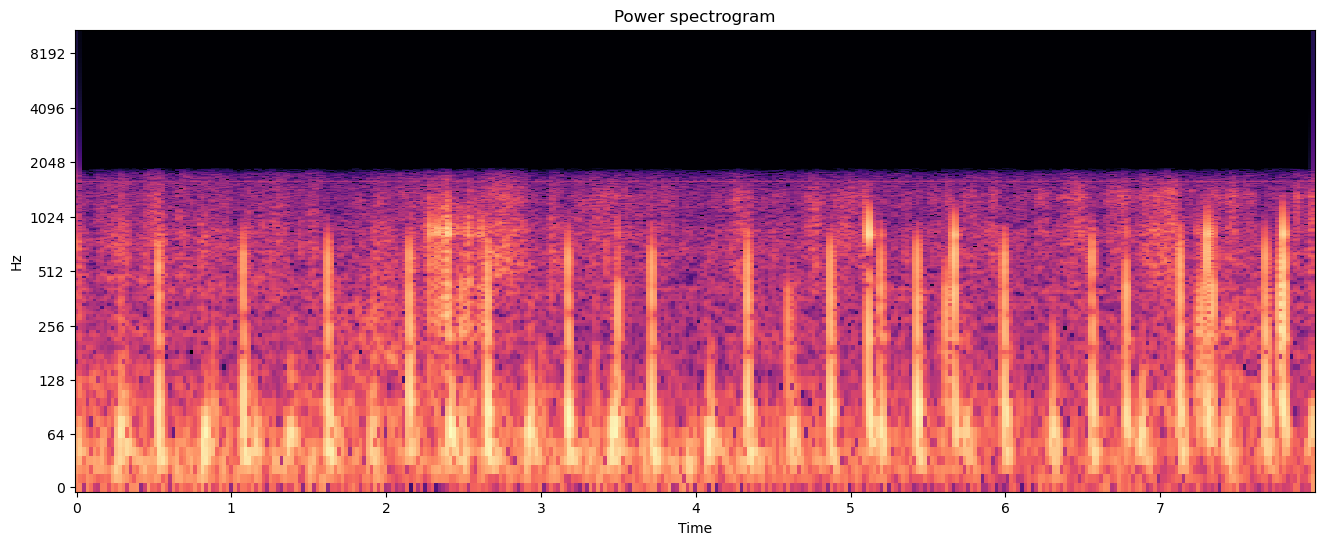

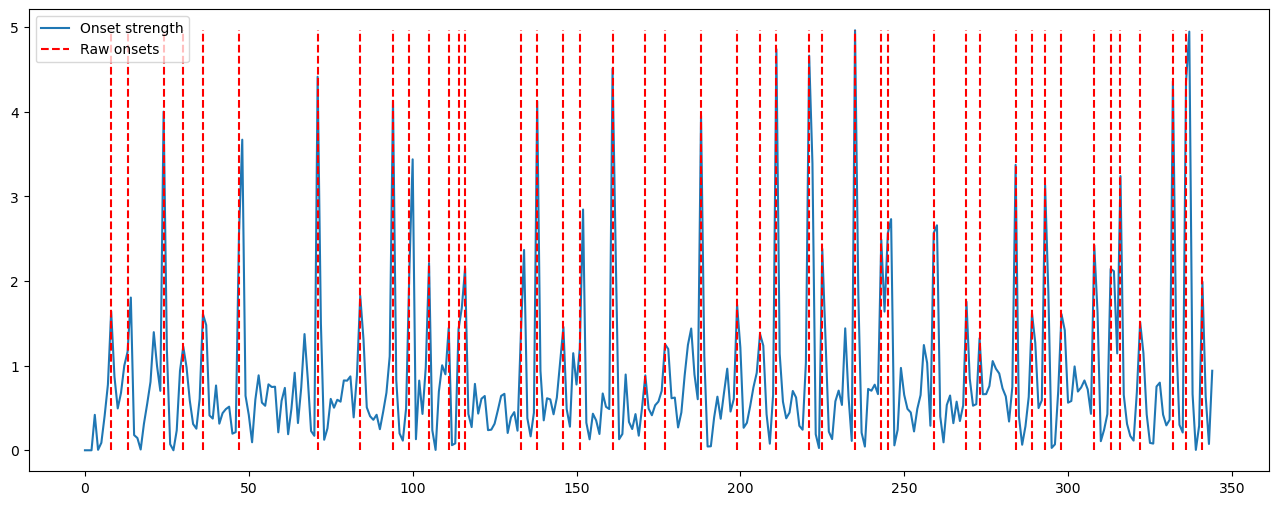

In [21]:
y=df.iloc[0].AV
sr=22050

signal=y

# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(y, sr=sr)
onset_frames = librosa.onset.onset_detect(signal, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)


# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(16, 6))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')


y=df.iloc[0].AV
sr=22050

signal=y

oenv = librosa.onset.onset_strength(y=y, sr=sr)
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)

# Plot the results
plt.figure(figsize=(16, 6))

plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets', color='r',linestyle='--')
plt.legend(frameon=True, framealpha=0.75)

In [17]:
df_pres

,Patient_ID,AV,MV,PV,TV,MURMUR,SC_mean_AV,SC_mean_MV,SC_mean_PV,SC_mean_TV
1,9979,"[0.04911021, 0.06300914, 0.07732098, 0.0912046...","[0.14847445, 0.16823082, 0.18181917, 0.1891644...","[0.94922936, 1.0470796, 1.0954523, 1.0936234, ...","[0.013476763, 0.01739587, 0.013739649, -0.0018...",Present,361.653780,338.142817,491.964817,176.567618
3,13918,"[0.0004159419, 0.0008962695, 0.0011781004, 0.0...","[-0.0535802, -0.060866673, -0.065505505, -0.06...","[0.6047976, 0.6647704, 0.6936066, 0.6913765, 0...","[-0.002155952, -0.00087783893, 0.0010613764, 0...",Present,503.428097,442.016252,515.245900,438.887037
4,14241,"[0.006493539, 0.0065751434, 0.0059580943, 0.00...","[0.07059953, 0.07696698, 0.07921517, 0.0774918...","[-0.038830675, -0.03927154, -0.036940027, -0.0...","[0.023087388, 0.026930997, 0.030365026, 0.0336...",Present,441.346144,519.622613,431.568444,501.674303
8,29045,"[-0.042356454, -0.04657941, -0.048419602, -0.0...","[0.004051143, 0.006092557, 0.008459051, 0.0110...","[-0.0011566154, -0.0006544603, 0.00022330925, ...","[-0.18107, -0.18800947, -0.18215847, -0.164884...",Present,417.613537,483.511209,498.509773,520.988250


In [18]:
df_abs

,Patient_ID,AV,MV,PV,TV,MURMUR,SC_mean_AV,SC_mean_MV,SC_mean_PV,SC_mean_TV
0,2530,"[-0.011331763, -0.0063461154, 0.0008841861, 0....","[0.36723548, 0.39998227, 0.4128391, 0.4063368,...","[0.07548434, 0.08113554, 0.08231447, 0.0793684...","[0.06667692, 0.07404709, 0.07828741, 0.0795538...",Absent,472.741372,498.512640,305.222491,410.571567
5,14998,"[0.18650353, 0.20451608, 0.2070004, 0.19213542...","[0.003019041, 0.0046704146, 0.0064322776, 0.00...","[0.00786276, 0.011232967, 0.014208761, 0.01620...","[-0.0084971655, -0.009817731, -0.010633876, -0...",Absent,529.765400,552.810820,494.331769,535.763649
6,23625,"[0.0073306933, 0.005942596, 0.003964544, 0.001...","[0.043617964, 0.04564083, 0.044442482, 0.04025...","[-0.273885, -0.30803826, -0.33009908, -0.33933...","[0.0015053503, 0.0013998933, 0.0011277263, 0.0...",Absent,376.072210,298.659203,529.666870,364.203558
7,24160,"[0.025746454, 0.02780911, 0.028367158, 0.02750...","[-0.0061448854, -0.0071288254, -0.0076846816, ...","[-0.025995228, -0.021946335, -0.014136325, -0....","[-0.96016484, -1.0620905, -1.1174103, -1.12844...",Absent,532.718445,544.685983,451.699557,481.470465


In [17]:
df_pres.describe() - df_abs.describe()

,SC_mean_AV,SC_mean_MV,SC_mean_PV,SC_mean_TV,BW_mean_AV,BW_mean_MV,BW_mean_PV,BW_mean_TV,AC_mean_AV,AC_mean_MV,AC_mean_PV,AC_mean_TV
count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,-46.813967,-27.843939,39.092062,-38.473008,2.493547,3.030292,17.742334,-52.378102,-0.003329,-0.124841,-0.018125,0.000245
std,-14.525013,-40.619460,-62.121557,83.394727,-31.785079,-13.405553,12.801965,39.591486,-0.000179,-0.237691,-0.010272,-0.011262
min,-14.418431,39.483614,126.345953,-187.635940,44.662203,30.615914,-19.699658,-116.143793,0.002380,0.000500,-0.002303,-0.001021
25%,-44.950484,-32.501388,61.785433,-25.672383,23.686526,-4.336358,11.892573,-55.897673,-0.001298,-0.003238,-0.015464,0.013395
50%,-71.773546,-58.835581,22.221632,24.259654,-6.050962,-7.734242,36.008185,-29.059188,-0.008445,-0.008818,-0.022459,0.010839
75%,-73.637029,-54.178132,-0.471740,11.459029,-27.243941,-0.367592,41.857946,-25.539616,-0.010476,-0.130421,-0.025120,-0.002312
max,-29.290347,-33.188207,-14.420969,-14.775400,-22.586091,-3.026263,18.652625,-35.250238,0.001193,-0.482229,-0.025280,-0.019678
